In [79]:
import cv2 
import matplotlib.pyplot as plt 

In [80]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

In [81]:
def equalize_clahe_color_hsv(img):
    """ 
    1. Split the image into three channels of HSV
    2. Equalize the V channel with CLAHE
    3. Then, merge them all back and convert to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

    eq_V = cla.apply(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image

In [82]:
def equalize_clahe_color_lab(img):
    """
    1. Split the image into three-channel of LAB
    2. Apply CLAHE to L-Channel 
    3. Merge them all back and convert to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    L, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
    eq_L = cla.apply(L)
    eq_image = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_Lab2BGR)
    return eq_image
   

In [83]:
def equalize_clahe_color_yuv(img):
    """
    1. Split the image into YUV 
    2. Applying CLAHE to the Y channel
    3. Merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    Y, U, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    eq_Y = cla.apply(Y)
    eq_image = cv2.cvtColor(cv2.merge([eq_Y, U, V]), cv2.COLOR_YUV2BGR)
    return eq_image

In [84]:
def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image

In [85]:
image = cv2.imread("images/lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

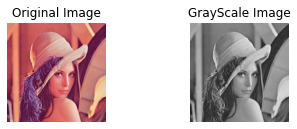

In [86]:
img_plt(image,"Original Image",1)
img_plt(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "GrayScale Image", 2)

Trying above created four functions for equalizing color images using ``CLAHE``

In [87]:
image_clahe_color = equalize_clahe_color(image)
image_clahe_color_lab = equalize_clahe_color_lab(image)
image_clahe_color_hsv = equalize_clahe_color_hsv(image)
image_clahe_color_yuv = equalize_clahe_color_yuv(image)

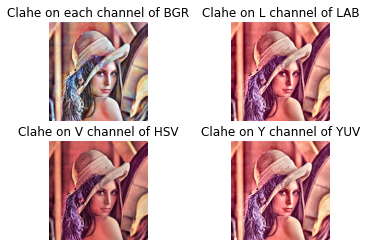

<Figure size 7200x3600 with 0 Axes>

In [88]:
img_plt(image_clahe_color, "Clahe on each channel of BGR", 1)
img_plt(image_clahe_color_lab, "Clahe on L channel of LAB", 2)
img_plt(image_clahe_color_hsv, "Clahe on V channel of HSV", 3)
img_plt(image_clahe_color_yuv, "Clahe on Y channel of YUV", 4)

plt.figure(figsize=(100,50))
plt.subplots_adjust(top=0.9, right=5.2, left=4, wspace=0.6, hspace=0.6)
plt.tight_layout()
plt.show()


Creating ``CLAHE`` to GRAYSCALE with varying __CLIPLIMIT__

In [89]:
clahe = cv2.createCLAHE(clipLimit = 2.0)
gray_image_clahe = clahe.apply(gray_image)

In [90]:
clahe.setClipLimit(5.0)
gray_image_clahe_2 = clahe.apply(gray_image)

In [91]:
clahe.setClipLimit(10.0)
gray_image_clahe_3 = clahe.apply(gray_image)

In [92]:
clahe.setClipLimit(20.0)
gray_image_clahe_4 = clahe.apply(gray_image)

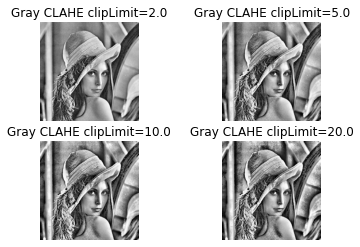

In [93]:
# Plot all the images
img_plt(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "Gray CLAHE clipLimit=2.0", 1)
img_plt(cv2.cvtColor(gray_image_clahe_2, cv2.COLOR_GRAY2BGR), "Gray CLAHE clipLimit=5.0", 2)
img_plt(cv2.cvtColor(gray_image_clahe_3, cv2.COLOR_GRAY2BGR), "Gray CLAHE clipLimit=10.0", 3)
img_plt(cv2.cvtColor(gray_image_clahe_4, cv2.COLOR_GRAY2BGR), "Gray CLAHE clipLimit=20.0", 4)